This is the assignment for Thinkful bootcamp Data Visualization and Exploration - Exploring data with Seaborn plots.  

# Exploring Data with Seaborn Assignments
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
* Choose one variable and plot that variable four different ways.
* Choose two continuous variables, and plot them three different ways.
* Choose one continuous variable and one categorical variable, and plot them six different ways.
* Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

#input dataset
df = pd.read_csv('Accidental_Drug_Related_Deaths__2012-2017.csv')

# print first 5 rows
print ("\n\nFirst 5 rows\n")
print (df.head(5))




First 5 rows

  CaseNumber        Date     Sex   Race   Age Residence City Residence State  \
0   13-16336  11/09/2013  Female  White  53.0         GROTON             NaN   
1   12-18447  12/29/2012    Male  White  30.0        WOLCOTT             NaN   
2    14-2758  02/18/2014    Male  White  43.0        ENFIELD             NaN   
3   14-13497  09/07/2014  Female  White  24.0    WALLINGFORD             NaN   
4   13-14421  10/04/2013  Female  White  26.0     WEST HAVEN             NaN   

  Residence County   Death City Death State  ... Benzodiazepine Methadone  \
0       NEW LONDON       GROTON         NaN  ...              Y       NaN   
1        NEW HAVEN    WATERBURY         NaN  ...            NaN       NaN   
2              NaN      ENFIELD         NaN  ...              Y       NaN   
3              NaN  WALLINGFORD         NaN  ...            NaN       NaN   
4        NEW HAVEN   WEST HAVEN         NaN  ...            NaN       NaN   

  Amphet Tramad Morphine (not heroin) Ot

In [2]:
df.rename(columns= {'Morphine (not heroin)':'Morphine_non_heroin', 
                   'Any Opioid': 'Any_Opioid',
                   'Residence City':'Residence_City',
                   'Residence State':'Residence_State',
                   'Residence County':'Residence_County',
                   'Death City':'Death_City',
                   'Death State':'Death_State',
                   'Death County':'Death_County'},
                    inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 32 columns):
CaseNumber              4081 non-null object
Date                    4079 non-null object
Sex                     4077 non-null object
Race                    4070 non-null object
Age                     4079 non-null float64
Residence_City          3970 non-null object
Residence_State         2142 non-null object
Residence_County        3357 non-null object
Death_City              4077 non-null object
Death_State             2200 non-null object
Death_County            2899 non-null object
Location                4059 non-null object
DescriptionofInjury     1493 non-null object
InjuryPlace             4002 non-null object
ImmediateCauseA         4079 non-null object
Heroin                  2147 non-null object
Cocaine                 1173 non-null object
Fentanyl                1464 non-null object
Oxycodone               531 non-null object
Oxymorphone             97 non-null ob

There are 4081 rows in the dataset. Those missing data in the drug columns will be filled with 'N'.

In [3]:
# replace NaN value with 'N, and make all lower case y to uppercase Y
values={
'Heroin':'N', 
'Cocaine':'N', 
'Fentanyl':'N',
'Oxycodone':'N',
'Oxymorphone':'N',
'EtOH':'N',
'Hydrocodone':'N',
'Benzodiazepine':'N',
'Methadone':'N',
'Amphet':'N',
'Tramad':'N',
'Morphine_non_heroin':'N',
'Other':'N',
'Any_Opioid':'N'
}

df= df.fillna(value=values)

replacements={'y':'Y'}
df= df.replace(replacements)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 32 columns):
CaseNumber              4081 non-null object
Date                    4079 non-null object
Sex                     4077 non-null object
Race                    4070 non-null object
Age                     4079 non-null float64
Residence_City          3970 non-null object
Residence_State         2142 non-null object
Residence_County        3357 non-null object
Death_City              4077 non-null object
Death_State             2200 non-null object
Death_County            2899 non-null object
Location                4059 non-null object
DescriptionofInjury     1493 non-null object
InjuryPlace             4002 non-null object
ImmediateCauseA         4079 non-null object
Heroin                  4081 non-null object
Cocaine                 4081 non-null object
Fentanyl                4081 non-null object
Oxycodone               4081 non-null object
Oxymorphone             4081 non-null

## Choose one variable and plot that variable 4 different ways
The chosen variable is age.  

In [4]:
print(df[df['Age'].isnull()])

     CaseNumber        Date  Sex Race  Age Residence_City Residence_State  \
779     14-9876  06/28/2014  NaN  NaN  NaN            NaN             NaN   
1891   15-16348         NaN  NaN  NaN  NaN            NaN             NaN   

     Residence_County Death_City Death_State  ... Benzodiazepine Methadone  \
779               NaN        NaN         NaN  ...              Y         N   
1891              NaN        NaN         NaN  ...              N         N   

     Amphet Tramad Morphine_non_heroin Other Any_Opioid MannerofDeath  \
779       N      N                   N     N          N      Accident   
1891      N      N                   N     N          N      Accident   

     AmendedMannerofDeath                     DeathLoc  
779                   NaN  CT\n(41.544654, -72.651713)  
1891                  NaN  CT\n(41.544654, -72.651713)  

[2 rows x 32 columns]


In [5]:
bins = [0, 10,20,30,40,50,60, 70, 80, 90 ] 
labels = [10,20,30,40,50,60, 70, 80, 90] 
df['binned'] = pd.cut(df.Age, bins=bins, labels=labels)
print(df[['binned', 'Age']].head()) 

  binned   Age
0     60  53.0
1     30  30.0
2     50  43.0
3     30  24.0
4     30  26.0


Two rows in Age are missing (NaN).  

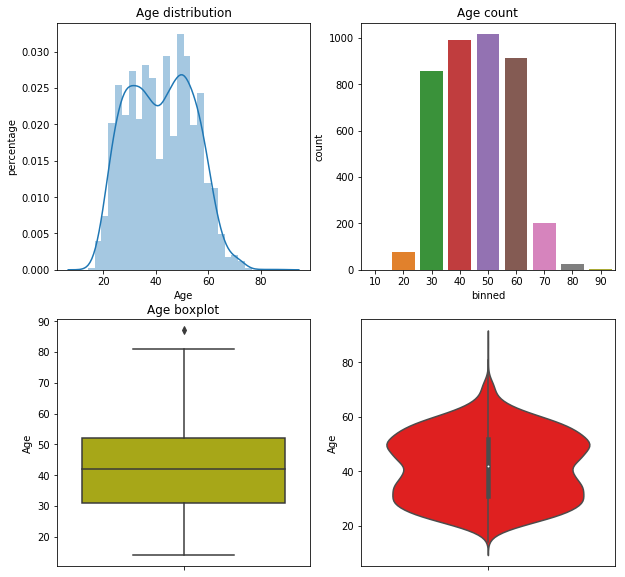

In [6]:
# Plot Age in 4 different ways: histogram, countplot, boxplot, and violinplot
fig=plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)

sns.distplot(df.Age.dropna())
plt.title('Age distribution')
plt.ylabel('percentage')

plt.subplot(2, 2, 2)
# seaborn countplot with bins
bins = [0, 10,20,30,40,50,60, 70, 80, 90 ] 
labels = [10,20,30,40,50,60, 70, 80, 90] 
df['binned'] = pd.cut(df.Age, bins=bins, labels=labels)
sns.countplot(x='binned', data=df)
#plt.xticks(rotation=90)
##plt.hist(df.Age, bins, histtype='bar', rwidth=0.8)
##plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Age count')

plt.subplot(2, 2, 3)
sns.boxplot(y=df.Age, color='y')
plt.title('Age boxplot')

plt.subplot(2, 2, 4)
sns.violinplot(y=df.Age, color ='r')

plt.show()

Histogram and countplot both show the distribution.  Boxplot is focused on average of the Age and standard deviation. Violin plot is mostly used with multiple variables in one plot.  

## Choose 2 continue variables and plot them 3 different ways
The variables chosen are date(year) and number of cases.  

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
#df.info()
df.index = df['Date'] 
## create a new dataset 'yearly'
yearly=df.resample('Y').count()
yearly.rename(columns={'CaseNumber':'CaseCount'}, inplace=True)
#yearly=yearly.drop(
#    columns=['Date','Sex','Race','Age','Residence City','Residence State','Residence County', 'Death City',
#             'Death State', 'Death County', 'Location', 'DescriptionofInjury', 'InjuryPlace', 'ImmediateCauseA',
#             'MannerofDeath', 'AmendedMannerofDeath', 'DeathLoc'])
yearly.index = ([2012, 2013, 2014, 2015, 2016, 2017])
print(yearly)

      CaseCount  Date   Sex  Race   Age  Residence_City  Residence_State  \
2012        355   355   355   355   355             350                0   
2013        490   490   490   490   490             477                0   
2014        558   558   557   555   557             538                0   
2015        723   723   723   722   723             699              698   
2016        917   917   916   913   917             888              430   
2017       1036  1036  1035  1034  1036            1018             1014   

      Residence_County  Death_City  Death_State  ...  Methadone  Amphet  \
2012               334         354            0  ...        355     355   
2013               460         490            0  ...        490     490   
2014                 0         557            0  ...        558     558   
2015               686         723          722  ...        723     723   
2016               883         917          442  ...        917     917   
2017             

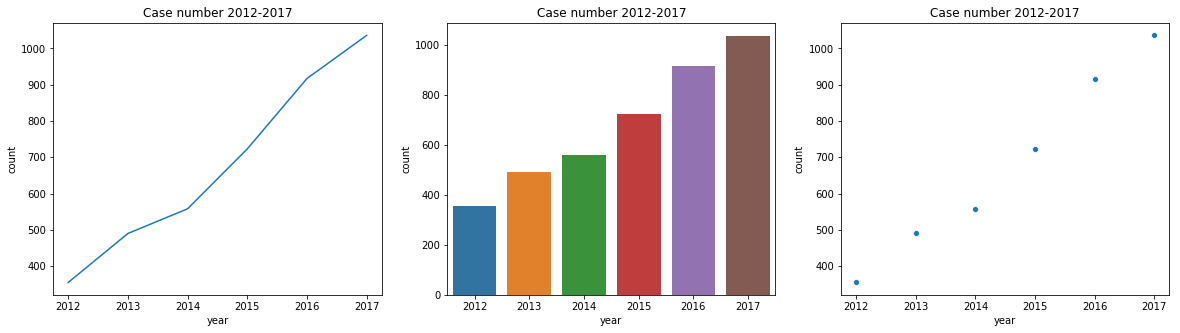

In [8]:
fig=plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
plt.plot(yearly.CaseCount)
plt.title('Case number 2012-2017')
plt.xlabel('year')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.barplot(x=yearly.index, y=yearly.CaseCount)
plt.title('Case number 2012-2017')
plt.xlabel('year')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.scatterplot(x=yearly.index, y=yearly.CaseCount)
plt.title('Case number 2012-2017')
plt.xlabel('year')
plt.ylabel('count')

plt.show()

Above are the 3 different ways to show the case_number vs years:  line plot, bar plot, and dot plots. In this case, bar plot is aesthetically preferable.  

## Choose one continuous variable and one categorical variable, and plot them six different ways.
In this case, age and sex are chosen for analysis.  

In [9]:
## Create new column 'Year' 
df['Year'] = df['Date'].dt.year

## Create new df2016 for year 2016
df2016 = df.loc[df['Year'] == 2016]

df2016.head()

,CaseNumber,Date,Sex,Race,Age,Residence_City,Residence_State,Residence_County,Death_City,Death_State,...,Amphet,Tramad,Morphine_non_heroin,Other,Any_Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc,binned,Year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-20,16-3,2016-05-20,Male,White,36.0,AVON,CT,HARTFORD,AVON,CT,...,N,N,N,N,N,Accident,NaN,"AVON, CT\n(41.809641, -72.830547)",40,2016.0
2016-03-25,16-1375,2016-03-25,Male,Black,68.0,NORWICH,CT,NEW LONDON,NORWICH,CT,...,N,N,N,N,N,Accident,NaN,"NORWICH, CT\n(41.524304, -72.075821)",70,2016.0
2016-05-02,16-1249,2016-05-02,Male,White,37.0,MERIDEN,CT,NEW HAVEN,MERIDEN,CT,...,N,N,N,N,N,Accident,NaN,"MERIDEN, CT\n(41.537589, -72.8011)",40,2016.0
2016-11-13,16-2654,2016-11-13,Male,"Hispanic, White",31.0,NEW BRITAIN,NaN,HARTFORD,NEW BRITAIN,NaN,...,N,N,N,N,N,Accident,NaN,"NEW BRITAIN, CT\n(41.667528, -72.783437)",40,2016.0
2016-04-11,16-2115,2016-04-11,Male,White,44.0,EAST WINDSOR,CT,HARTFORD,HARTFORD,CT,...,N,N,N,difluroethane,N,Accident,NaN,"HARTFORD, CT\n(41.765775, -72.673356)",50,2016.0


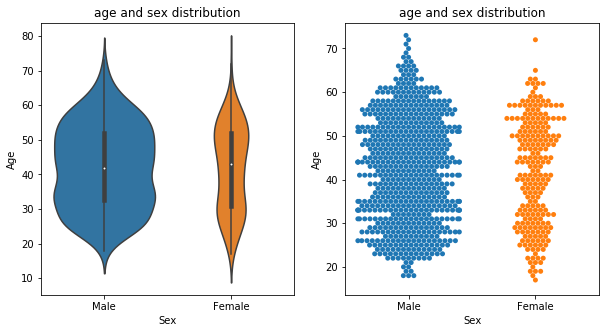

In [10]:
fig=plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
sns.violinplot(x='Sex', y='Age', scale = 'count', data = df2016)
plt.title('age and sex distribution')

plt.subplot(1, 2, 2)
sns.swarmplot(x='Sex', y='Age', data = df2016)
plt.title('age and sex distribution')
plt.show()



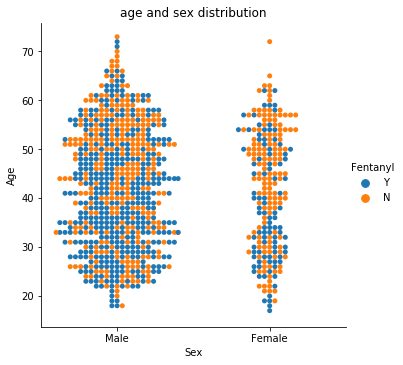

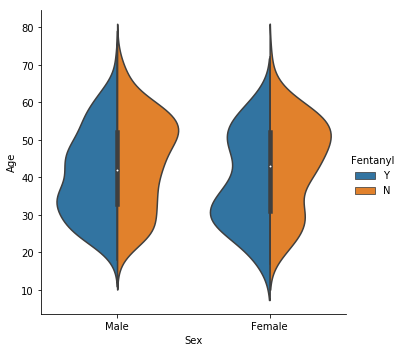

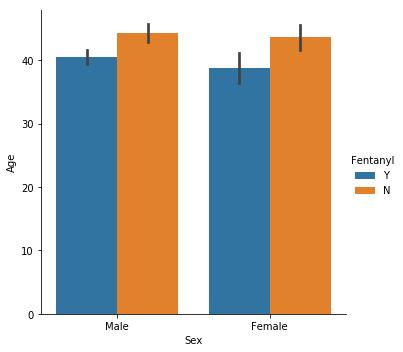

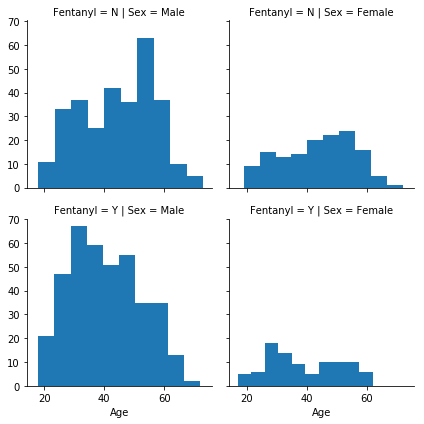

In [11]:
sns.catplot(x='Sex', y='Age', kind='swarm', hue='Fentanyl', hue_order = ['Y', 'N'], data = df2016)
plt.title('age and sex distribution')

sns.catplot(x="Sex", y="Age", hue="Fentanyl", kind="violin", hue_order = ['Y', 'N'], split=True, data=df2016)

sns.catplot(x="Sex", y="Age", hue="Fentanyl", kind="bar", hue_order = ['Y', 'N'], data=df2016)


g=sns.FacetGrid(df2016, row="Fentanyl", col="Sex")
g.map(plt.hist, "Age")
plt.show()

# Distributions
Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
* Probability distributions
* Bivariate relationships
* Whether the distributions or the relationships vary across groups
* Accompany your plot with a written description of what you see.

In [12]:
df = pd.read_csv('processed.cleveland.csv', na_values=['?'])

In [13]:
df.sex = df.sex.astype('category')
df.cp = df.cp.astype('category')
df.fbs = df.fbs.astype('category')
df.restecg = df.restecg.astype('category')
df.exang = df.exang.astype('category')
df.slope = df.slope.astype('category')
df.thal = df.thal.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null category
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null category
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null category
ca          299 non-null float64
thal        301 non-null category
target      303 non-null int64
dtypes: category(7), float64(2), int64(5)
memory usage: 19.5 KB


In [14]:
# change the target notation
df['target']=np.where(df['target'] >= 1, 1, df['target'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null category
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null category
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null category
ca          299 non-null float64
thal        301 non-null category
target      303 non-null int64
dtypes: category(7), float64(2), int64(5)
memory usage: 19.5 KB


## Probability distributions

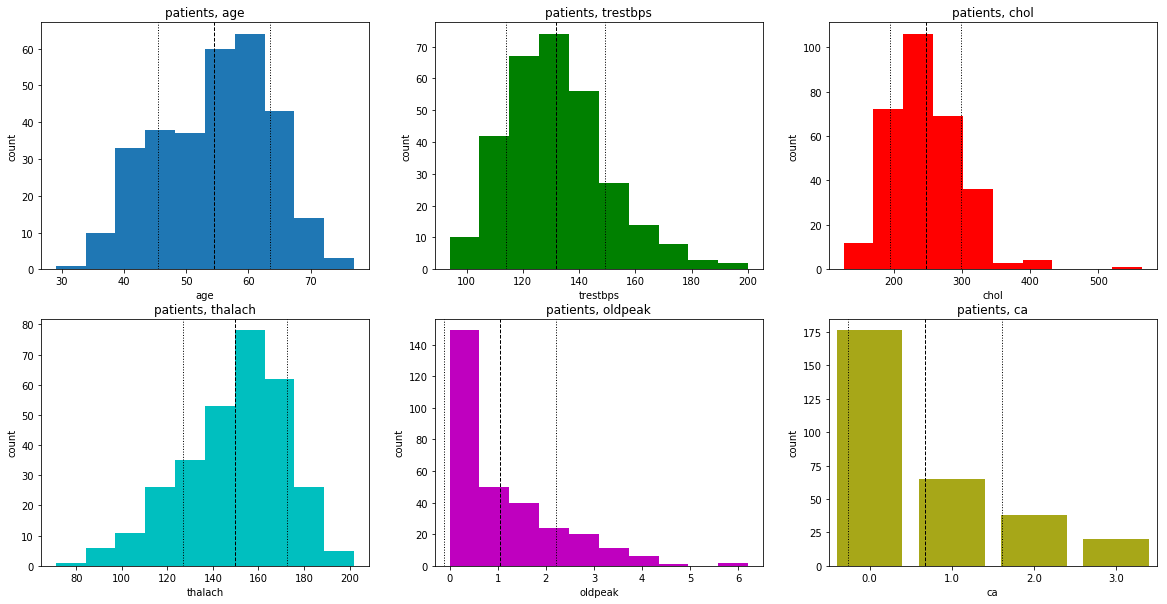

In [15]:
# Histogram and barchart for age, trestbps, chol, thalach, oldpeak, ca
fig=plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.title('patients, age')
plt.axvline(df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['age'].mean()+df['age'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['age'].mean()-df['age'].std(), color='k', linestyle='dotted', linewidth=1)


plt.subplot(2, 3, 2)
plt.hist(df['trestbps'], color ='g')
plt.xlabel('trestbps')
plt.ylabel('count')
plt.title('patients, trestbps')
plt.axvline(df['trestbps'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['trestbps'].mean()+df['trestbps'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['trestbps'].mean()-df['trestbps'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 3)
plt.hist(df['chol'], color ='r')
plt.xlabel('chol')
plt.ylabel('count')
plt.title('patients, chol')
plt.axvline(df['chol'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['chol'].mean()+df['chol'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['chol'].mean()-df['chol'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 4)
plt.hist(df['thalach'], color ='c')
plt.xlabel('thalach')
plt.ylabel('count')
plt.title('patients, thalach')
plt.axvline(df['thalach'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['thalach'].mean()+df['thalach'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['thalach'].mean()-df['thalach'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 5)
plt.hist(df['oldpeak'], color ='m')
plt.xlabel('oldpeak')
plt.ylabel('count')
plt.title('patients, oldpeak')
plt.axvline(df['oldpeak'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['oldpeak'].mean()+df['oldpeak'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['oldpeak'].mean()-df['oldpeak'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 6)
#plt.hist(df['ca'])
sns.countplot(x='ca', data=df, color ='y')
plt.xlabel('ca')
plt.ylabel('count')
plt.title('patients, ca')
plt.axvline(df['ca'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['ca'].mean()+df['ca'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['ca'].mean()-df['ca'].std(), color='k', linestyle='dotted', linewidth=1)
plt.show()

The distribution of age, trestbps, chol, thalach, oldpeak and ca are shown above.  The distribution of age and thalach are skewed to the left, while trestbps, chol, oldpeak and ca are right skewed.  

## Bivariate Relationships

In [16]:
df.corr()

,age,trestbps,chol,thalach,oldpeak,ca,target
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.362605,0.223120
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171,0.098773,0.150825
chol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.119000,0.085164
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.264246,-0.417167
oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.295832,0.424510
ca,0.362605,0.098773,0.119000,-0.264246,0.295832,1.000000,0.460442
target,0.223120,0.150825,0.085164,-0.417167,0.424510,0.460442,1.000000


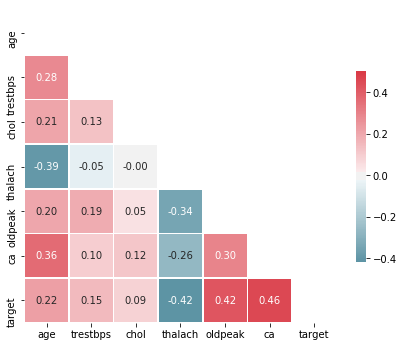

In [17]:
# Heat Map for correlation
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, annot=True, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, fmt= '.2f', cbar_kws={"shrink": .5})


# f,ax = plt.subplots(figsize=(7, 7))

# sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

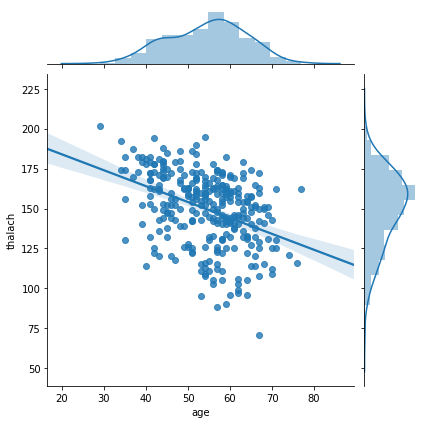

In [18]:
sns.jointplot(x="age", y="thalach", data=df, kind='reg')
plt.show()

The bicariate relationship, in this case "age-thalach", shows a reverse correlation between thalach and age.  

## Across groups distribution

Here we look into the one categorical variable 'Target' and the distribution of numerical variables 'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca.

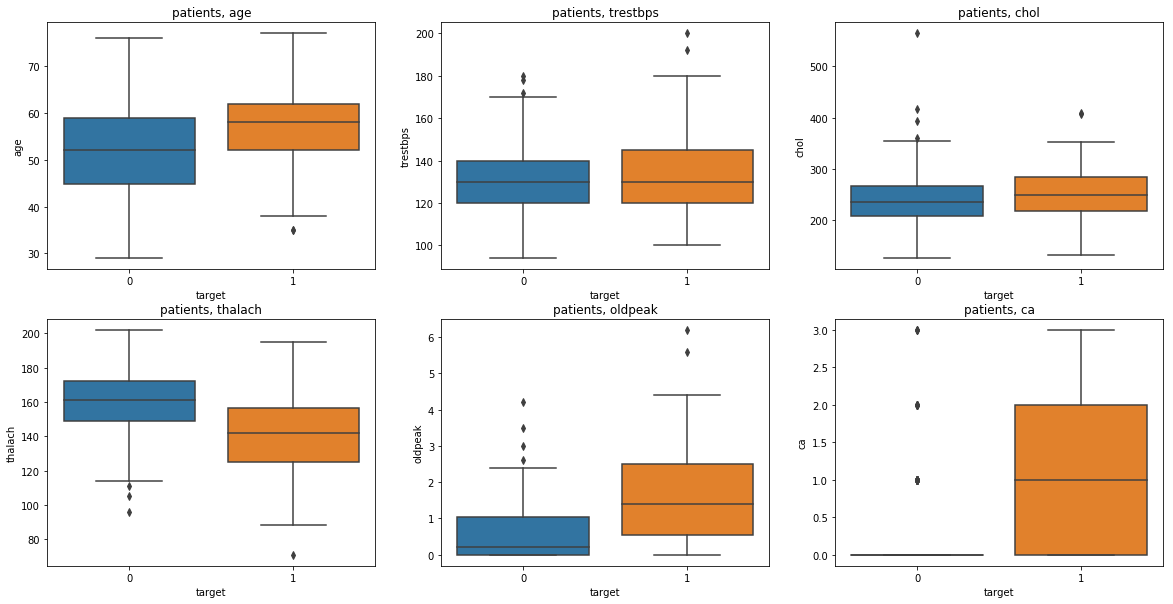

In [19]:
# box plot for people with or without disease
fig=plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='target', y='age', data=df)
plt.xlabel('target')
plt.ylabel('age')
plt.title('patients, age')

plt.subplot(2, 3, 2)
sns.boxplot(x='target', y='trestbps', data=df)
plt.xlabel('target')
plt.ylabel('trestbps')
plt.title('patients, trestbps')

plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='chol', data=df)
plt.xlabel('target')
plt.ylabel('chol')
plt.title('patients, chol')

plt.subplot(2, 3, 4)
sns.boxplot(x='target', y='thalach', data=df)
plt.xlabel('target')
plt.ylabel('thalach')
plt.title('patients, thalach')

plt.subplot(2, 3, 5)
sns.boxplot(x='target', y='oldpeak', data=df)
plt.xlabel('target')
plt.ylabel('oldpeak')
plt.title('patients, oldpeak')

plt.subplot(2, 3, 6)
sns.boxplot(x='target', y='ca', data=df)
plt.xlabel('target')
plt.ylabel('ca')
plt.title('patients, ca')

plt.show()

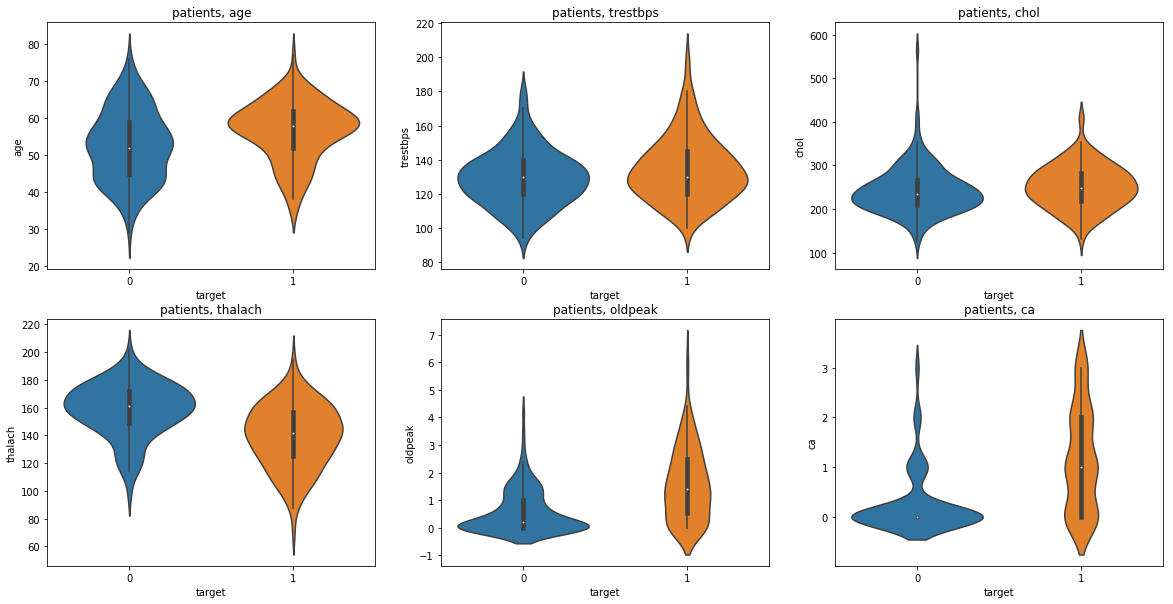

In [20]:
# box plot for people with or without disease
fig=plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
sns.violinplot(x='target', y='age', data=df)
plt.xlabel('target')
plt.ylabel('age')
plt.title('patients, age')

plt.subplot(2, 3, 2)
sns.violinplot(x='target', y='trestbps', data=df)
plt.xlabel('target')
plt.ylabel('trestbps')
plt.title('patients, trestbps')

plt.subplot(2, 3, 3)
sns.violinplot(x='target', y='chol', data=df)
plt.xlabel('target')
plt.ylabel('chol')
plt.title('patients, chol')

plt.subplot(2, 3, 4)
sns.violinplot(x='target', y='thalach', data=df)
plt.xlabel('target')
plt.ylabel('thalach')
plt.title('patients, thalach')

plt.subplot(2, 3, 5)
sns.violinplot(x='target', y='oldpeak', data=df)
plt.xlabel('target')
plt.ylabel('oldpeak')
plt.title('patients, oldpeak')

plt.subplot(2, 3, 6)
sns.violinplot(x='target', y='ca', data=df)
plt.xlabel('target')
plt.ylabel('ca')
plt.title('patients, ca')

plt.show()

Violin plot shows the different distributions between target group. The distributions in age, thalach, oldpeak, and ca are different among patients with or without heart diseases, suggesting that age, thalach,  oldpeak and ca may be factors associating with the heart diseases.  